In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import os 

In [3]:
product_sales_df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [4]:
product_sales_df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [5]:
product_sales_df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [6]:
target_col = 'units_sold'

In [7]:
#removing Nan Values

rows = []
for col in product_sales_df.columns:
    if product_sales_df[col].isin([0, 1, np.nan]).all():
        row_dict = {'ColumnName': col, 'DataType': 'binary', 'HasMissing':product_sales_df.isnull().any().loc[col],
                    'NumberOfMissingCells': product_sales_df.isnull().sum().loc[col], 'CorrelationWithTarget': product_sales_df.corr()[target_col].loc[col],
                    'Mean': np.nan, 'Median': np.nan,'Mode': product_sales_df.mode()[col].loc[0], 'MinValue': np.nan, 'MaxValue': np.nan }
    
    elif product_sales_df.dtypes.loc[col] == 'int64' or product_sales_df.dtypes.loc[col] == 'float64':
        
        row_dict = {'ColumnName': col, 'DataType': product_sales_df.dtypes.loc[col], 'HasMissing':product_sales_df.isnull().any().loc[col],
                    'NumberOfMissingCells': product_sales_df.isnull().sum().loc[col], 'CorrelationWithTarget': product_sales_df.corr()[target_col].loc[col],
                    'Mean': product_sales_df.mean().loc[col], 'Median':product_sales_df.median().loc[col], 'Mode': product_sales_df.mode()[col].loc[0],
                    'MinValue': product_sales_df.min().loc[col], 'MaxValue': product_sales_df.max().loc[col] }
        
    else:
        row_dict = {'ColumnName': col, 'DataType': product_sales_df.dtypes.loc[col], 'HasMissing':product_sales_df.isnull().any().loc[col],
                    'NumberOfMissingCells': product_sales_df.isnull().sum().loc[col], 'CorrelationWithTarget': np.nan, 'Mean': np.nan, 'Median': np.nan,
                    'Mode': product_sales_df.mode()[col].loc[0], 'MinValue': np.nan, 'MaxValue': np.nan }
        
    rows.append(row_dict)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/1139895609.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Mean': product_sales_df.mean().loc[col], 'Median':product_sales_df.median().loc[col], 'Mode': product_sales_df.mode()[col].loc[0],
C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/1139895609.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Mean': product_sales_df.mean().loc[col], 'Median':product_sales_df.median().loc[col], 'Mode': product_sales_df.mode()[col].loc[0],
C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/1139895609.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is depre

C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/1139895609.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Mean': product_sales_df.mean().loc[col], 'Median':product_sales_df.median().loc[col], 'Mode': product_sales_df.mode()[col].loc[0],
C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/1139895609.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Mean': product_sales_df.mean().loc[col], 'Median':product_sales_df.median().loc[col], 'Mode': product_sales_df.mode()[col].loc[0],
C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/1139895609.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is depre

C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/1139895609.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Mean': product_sales_df.mean().loc[col], 'Median':product_sales_df.median().loc[col], 'Mode': product_sales_df.mode()[col].loc[0],
C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/1139895609.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Mean': product_sales_df.mean().loc[col], 'Median':product_sales_df.median().loc[col], 'Mode': product_sales_df.mode()[col].loc[0],
C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/1139895609.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is depre

In [8]:
info_df = pd.DataFrame(rows, columns=['ColumnName', 'DataType', 'HasMissing', 'NumberOfMissingCells', 'CorrelationWithTarget', 'Mean', 'Median', 'Mode', 'MinValue', 'MaxValue'])

In [9]:
info_df.set_index('ColumnName', inplace=True)

In [10]:
info_df = info_df.sort_values('CorrelationWithTarget', ascending=False, na_position='last')

In [11]:
print("FOR NUMERICAL COLUMNS")
info_df[info_df['DataType']!='object']

FOR NUMERICAL COLUMNS


,DataType,HasMissing,NumberOfMissingCells,CorrelationWithTarget,Mean,Median,Mode,MinValue,MaxValue
ColumnName,,,,,,,,,
units_sold,int64,False,0,1.000000,4339.005086,1000.00000,100.0,1.000000,100000.0
rating_count,int64,False,0,0.899464,889.659250,150.00000,0.0,0.000000,20744.0
rating_three_count,float64,True,45,0.894243,134.549738,24.00000,0.0,0.000000,3658.0
rating_four_count,float64,True,45,0.891116,179.599476,31.50000,0.0,0.000000,4152.0
rating_five_count,float64,True,45,0.876231,442.263743,79.00000,1.0,0.000000,11548.0
rating_two_count,float64,True,45,0.866685,63.711387,11.00000,0.0,0.000000,2003.0
rating_one_count,float64,True,45,0.832816,95.735602,20.00000,0.0,0.000000,2789.0
merchant_rating_count,int64,False,0,0.272897,26495.832804,7936.00000,32168.0,0.000000,2174765.0
merchant_has_profile_picture,binary,False,0,0.143529,NaN,NaN,0.0,NaN,NaN


In [12]:
print("\nFor categorical/non-numeric columns")
info_df[info_df['DataType']=='object'].drop(['CorrelationWithTarget', 'Mean', 'Median', 'MinValue', 'MaxValue'], axis=1)


For categorical/non-numeric columns


,DataType,HasMissing,NumberOfMissingCells,Mode
ColumnName,,,,
title,object,False,0,Nouvelle mode d'été femmes robe décontractée c...
title_orig,object,False,0,New Fashion Summer Women Casual Dress Round Ne...
currency_buyer,object,False,0,EUR
tags,object,False,0,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'..."
product_color,object,True,41,black
product_variation_size_id,object,True,14,S
shipping_option_name,object,False,0,Livraison standard
urgency_text,object,True,1100,Quantité limitée !
origin_country,object,True,17,CN


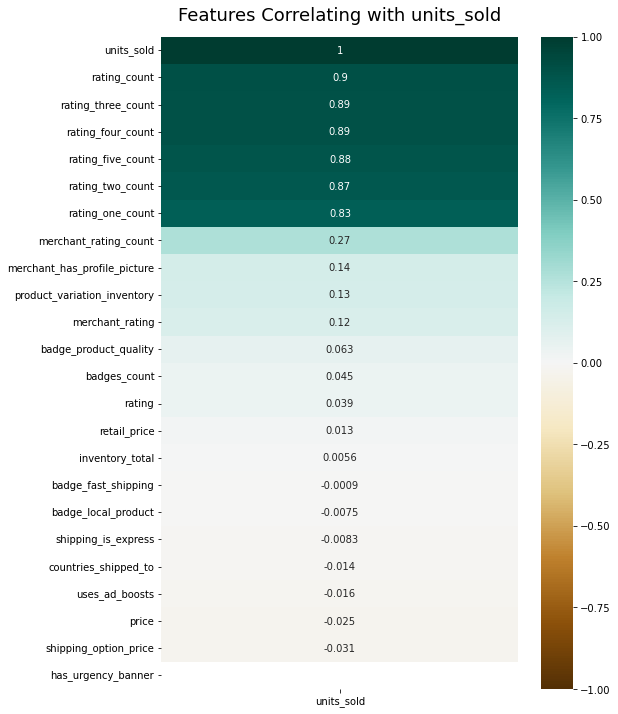

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(product_sales_df.corr()[[target_col]].sort_values(by=target_col, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f'Features Correlating with {target_col}', fontdict={'fontsize':18}, pad=16);

In [14]:
# start with categorical features and process them

In [15]:
product_sales_df['currency_buyer'].unique()

array(['EUR'], dtype=object)

In [16]:
count = product_sales_df['product_color'].value_counts()
count

black                 302
white                 254
yellow                105
blue                   99
pink                   99
                     ... 
greysnakeskinprint      1
denimblue               1
red & blue              1
offwhite                1
gold                    1
Name: product_color, Length: 101, dtype: int64

In [17]:
np.sort(product_sales_df['product_color'].dropna().unique())

array(['Army green', 'Black', 'Blue', 'Pink', 'RED', 'Rose red', 'White',
       'applegreen', 'apricot', 'army', 'army green', 'armygreen',
       'beige', 'black', 'black & blue', 'black & green',
       'black & stripe', 'black & white', 'black & yellow', 'blackwhite',
       'blue', 'blue & pink', 'brown', 'brown & yellow', 'burgundy',
       'camel', 'camouflage', 'claret', 'coffee', 'coolblack', 'coralred',
       'darkblue', 'darkgreen', 'denimblue', 'dustypink', 'floral',
       'fluorescentgreen', 'gold', 'gray', 'gray & white', 'green',
       'grey', 'greysnakeskinprint', 'ivory', 'jasper', 'khaki',
       'lakeblue', 'leopard', 'leopardprint', 'light green', 'lightblue',
       'lightgray', 'lightgreen', 'lightgrey', 'lightkhaki', 'lightpink',
       'lightpurple', 'lightred', 'lightyellow', 'mintgreen',
       'multicolor', 'navy', 'navy blue', 'navyblue', 'navyblue & white',
       'nude', 'offblack', 'offwhite', 'orange', 'orange & camouflage',
       'orange-red', 'pink

In [18]:
product_sales_df['product_color'] = product_sales_df['product_color'].str.lower()

In [19]:
product_sales_df[product_sales_df['product_color'].str.contains('&', na=False)]['product_color'].unique()

array(['red & blue', 'blue & pink', 'white & green', 'black & green',
       'orange & camouflage', 'pink & black', 'pink & grey',
       'black & white', 'white & black', 'pink & white', 'pink & blue',
       'black & stripe', 'gray & white', 'brown & yellow',
       'winered & yellow', 'navyblue & white', 'white & red',
       'black & yellow', 'black & blue'], dtype=object)

In [20]:
shade_to_colour = {
    'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue', 'darkblue': 'blue', 'denimblue': 'blue', 'navy blue': 'blue', 'prussianblue': 'blue',
    'navy': 'blue',
    'armygreen': 'green', 'army green': 'green', 'fluorescentgreen': 'green', 'mintgreen': 'green', 'light green': 'green', 'lightgreen': 'green',
    'applegreen': 'green', 'darkgreen': 'green', 'army': 'green', 'khaki': 'green', 'lightkhaki': 'green',
    'lightyellow': 'yellow', 
    'winered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'rose red': 'red', 'watermelonred': 'red', 'orange-red': 'red', 'rosered': 'red',
    'claret': 'red', 'burgundy': 'red', 
    'gray': 'grey', 'silver': 'grey','lightgray': 'grey', 'lightgrey': 'grey', 'greysnakeskinprint': 'grey',
    'coffee': 'brown', 'camel': 'brown', 'tan': 'brown', 
    'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
    'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
    'lightpurple': 'purple', 'coolblack': 'black', 'apricot': 'orange', 'offblack': 'black'
}

def update_color(col):
    if shade_to_colour.get(col, False):
        return shade_to_colour.get(col)
    elif '&' in col:
        return 'dual'
    elif col in shade_to_colour.values():
        return col
    else:
        return 'other'

product_sales_df['product_color'].replace(np.nan, 'others', inplace=True)

product_sales_df['product_color'] = product_sales_df.product_color.apply(update_color)

In [21]:
count = product_sales_df['product_color'].value_counts()
count

black     308
white     260
blue      164
green     151
red       144
pink      108
yellow    107
other     104
grey       87
purple     54
dual       40
orange     29
brown      17
Name: product_color, dtype: int64

In [22]:
col_df = product_sales_df.groupby('product_color').agg('sum')['units_sold'].to_frame()
col_df.reset_index(level=0, inplace=True)
col_df

,product_color,units_sold
0,black,1609463
1,blue,582808
2,brown,32050
3,dual,124850
4,green,580245
5,grey,512740
6,orange,193908
7,other,641222
8,pink,310650
9,purple,339480


<AxesSubplot:xlabel='product_color', ylabel='units_sold'>

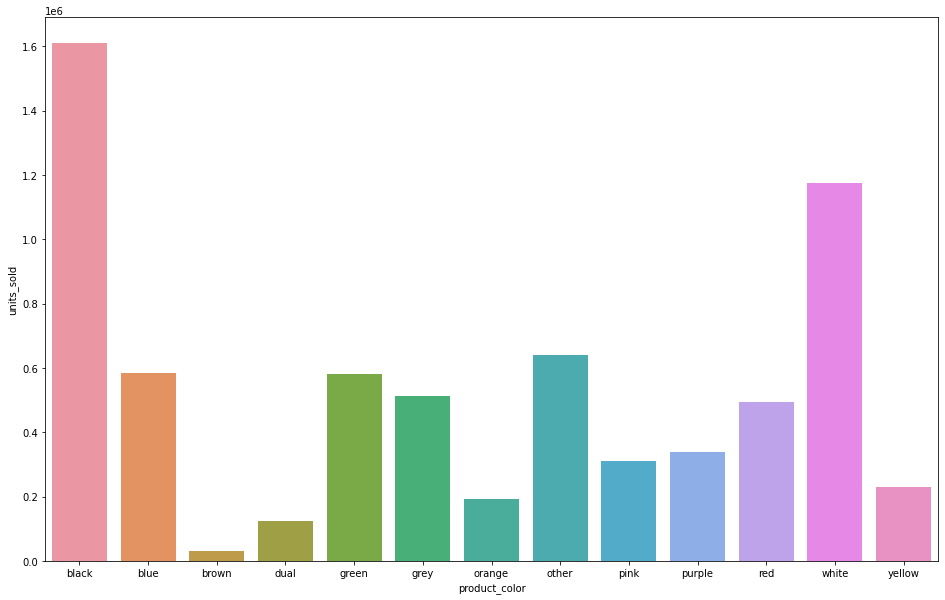

In [23]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.barplot(x="product_color", y="units_sold", data=col_df)

<AxesSubplot:xlabel='tags_count', ylabel='units_sold'>

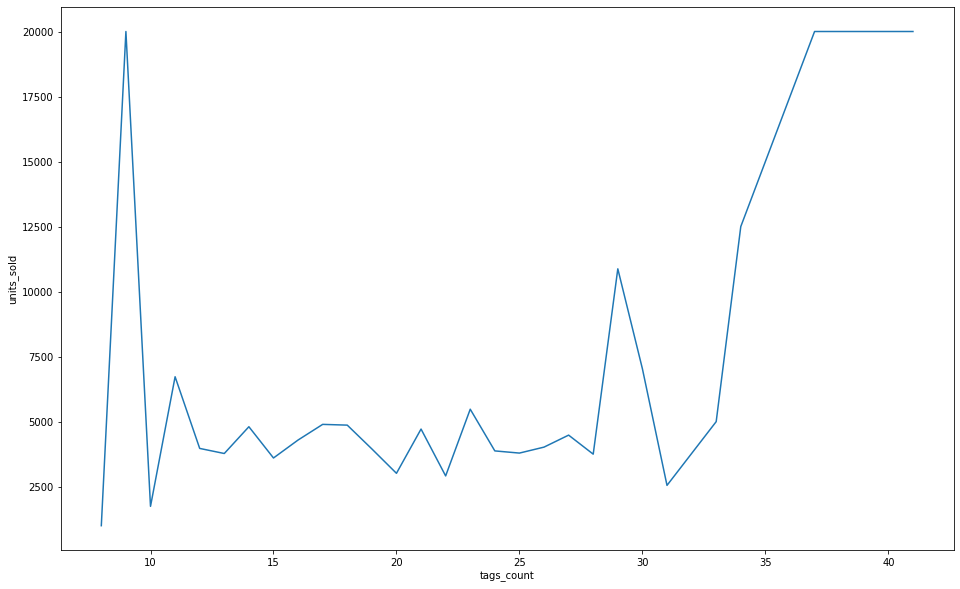

In [24]:
product_sales_df['tags_count'] = product_sales_df['tags'].str.split(',').str.len()

fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.lineplot(data=product_sales_df, x="tags_count", y="units_sold", ci=None)

In [25]:
product_sales_df[product_sales_df['tags_count']<=10]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tags_count
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,...,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08,10
12,Shorts de causalité d'été de nouvelles femmes ...,New Women's Summer Causal Shorts Drawstring Sh...,1.91,6,EUR,1000,1,3.45,141,49.0,...,4.123878,5d3c419de4b65d4fb81e7286,0,NaN,https://www.wish.com/c/5e9da39dc737cf255eddd4bf,https://contestimg.wish.com/api/webimage/5e9da...,5e9da39dc737cf255eddd4bf,summer,2020-08,8
42,NOUVEAU Red Bull Summer Mens Casual Shorts Pan...,NEW Red Bull Summer Mens Casual Shorts Pants L...,12.00,14,EUR,100,1,3.79,24,11.0,...,4.020408,5e5c7c2c77179e31406eece1,0,NaN,https://www.wish.com/c/5ea7e2d999ecf941204c42ee,https://contestimg.wish.com/api/webimage/5ea7e...,5ea7e2d999ecf941204c42ee,summer,2020-08,10
61,Pantalon de couleur unie à la mode pour femmes...,Women s New Fashion Solid Color Pants Loose Ca...,5.00,38,EUR,50,1,5.00,2,2.0,...,3.666667,5e4b6a0c57cc9b0b53e499a4,0,NaN,https://www.wish.com/c/5eba6ecb9a9e129fb97b5dfd,https://contestimg.wish.com/api/webimage/5eba6...,5eba6ecb9a9e129fb97b5dfd,summer,2020-08,10
87,Femmes 2019 Mode Bandage de mode 2019 Maillot ...,Women's 2019 Fashion Bandage SwimSuits Colorbl...,5.78,8,EUR,20000,1,4.00,3975,2054.0,...,4.184134,5b2620ddd1c360688799eb51,0,NaN,https://www.wish.com/c/5c061cf358603c4b35a19363,https://contestimg.wish.com/api/webimage/5c061...,5c061cf358603c4b35a19363,summer,2020-08,9
95,Pantalon de couleur unie à la mode pour femmes...,Women s New Fashion Solid Color Pants Loose Ca...,1.86,9,EUR,100,1,3.57,42,17.0,...,3.943019,56c94ae6df108f5af83b1e0f,0,NaN,https://www.wish.com/c/5e958754a9136f26ddb12929,https://contestimg.wish.com/api/webimage/5e958...,5e958754a9136f26ddb12929,summer,2020-08,10
428,NOUVEAU Red Bull Summer Mens Casual Shorts Pan...,NEW Red Bull Summer Mens Casual Shorts Pants L...,12.00,14,EUR,50,0,3.88,8,2.0,...,3.884615,5e5cb2f077179e1ac07004a2,0,NaN,https://www.wish.com/c/5ea7e2d9d113700dcbc76b82,https://contestimg.wish.com/api/webimage/5ea7e...,5ea7e2d9d113700dcbc76b82,summer,2020-08,10
460,100 pcs Été Jetable Sweat Pad Transpiration Ab...,100pcs Summer Disposable Sweat Pad Perspiratio...,9.00,46,EUR,100,0,4.86,7,6.0,...,4.228007,59815a929fbc512d72137ba5,0,NaN,https://www.wish.com/c/5e70ba09e3d51e1002f7cf8e,https://contestimg.wish.com/api/webimage/5e70b...,5e70ba09e3d51e1002f7cf8e,summer,2020-08,10
476,Mode Femmes Salopette D'été Bavoir Pantalon Sh...,Fashion Womens Jumpsuit Summer Bib Pants Short...,11.00,108,EUR,5000,0,2.95,299,72.0,...,3.873083,5ba8dffeb2f5b12221c73576,0,NaN,https://www.wish.com/c/5d6e5c9b045a156519de6483,https://contestimg.wish.com/api/webimage/5d6e5...,5d6e5c9b045a156519de6483,summer,2020-08,10
527,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.83,4,EUR,100,0,3.57,67,27.0,...,3.958790,56fba259138ef73c2a749a56,0,NaN,https://www.wish.com/c/5e12c01191235958ecdd6285,https://contestimg.wish.com/api/webimage/5e12c...,5e12c01191235958ecdd6285,summer,2020-08,10


In [26]:
# As we can see there are only 27 products with tags count less than 10 and only 2 with sales of 20000 and rest have sales like 50, 100, 1000, 5000 So these two are outlires

In [27]:
!pip install wordcloud

You should consider upgrading via the 'C:\Users\ASUS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


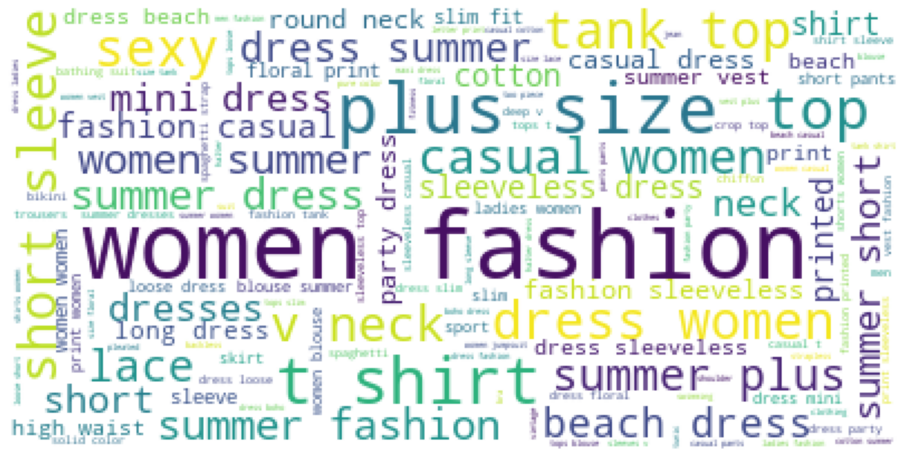

In [28]:
#Looking at the most common tags with the help of a wordcloud

from wordcloud import WordCloud
ustr = " ".join(product_sales_df['tags'].str.lower().str.split(',').sum())

fig = plt.gcf()
fig.set_size_inches( 16, 10)
wordcloud = WordCloud(background_color='white').generate(ustr) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
product_sales_df['product_variation_size_id'].unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', nan, 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS

In [30]:
product_sales_df['product_variation_size_id'].value_counts().head(50)

S                641
XS               356
M                200
XXS              100
L                 49
S.                18
XL                17
XXL               15
XXXS               6
s                  5
Size S             5
XS.                5
4XL                5
2XL                4
SIZE XS            4
M.                 4
Size-XS            4
Size-S             3
2pcs               3
SizeL              3
10 ml              3
33                 3
34                 3
size S             2
XXXXL              2
Size M             2
Size -XXS          2
35                 2
S(bust 88cm)       2
25                 2
1 pc.              2
S Pink             2
Size4XL            2
5XL                2
SIZE-XXS           2
Suit-S             2
One Size           2
Size S.            2
3XL                2
EU 35              2
29                 2
XXXXXL             2
1                  2
60                 1
Size-L             1
US5.5-EU35         1
choose a size      1
32/L         

In [31]:
#trying to reduce the number of sizes 
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')

C:\Users\ASUS\AppData\Local\Temp/ipykernel_30888/3658529757.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')


In [32]:
product_sales_df['product_variation_size_id'].unique()

array(['m', 'xs', 's', 'xxs', 'l', 'xxl', nan, 'choose a size', '32/l',
       'suit-s', 'xxxxxl', 'eu 35', '4', '1m by 3m', '3xl', 'xl',
       'women 36', 'us 65 (eu 37)', 'xxxs', '26(waist 72cm 28inch)', '29',
       '1pc', '100 cm', 'one size', '4xl', '1', 's/m(child)', '2pcs',
       'xxxl', '30 cm', '5xl', '33', '100 x 100cm(393 x 393inch)',
       '100pcs', '2xl', 'sizel', 'xxxxl', 'base & top & matte top coat',
       '35', '34', 's(bust 88cm)', 's (waist58-62cm)', 's(pink & black)',
       '20pcs', 'us-s', 'x   l', 'white', '25', 'round', 'pack of 1',
       '1 pc', 's diameter 30cm', '6xl', 'au plug low quality', '5pairs',
       '25-s', 's pink', 'daughter 24m', '2', 'baby float boat', '10 ml',
       '60', 'us55-eu35', '10pcs', '17', 'women 37', '3 layered anklet',
       '4-5 years', 'size4xl', 'first  generation', '80 x 200 cm',
       'eu39(us8)', 'base coat', '36', '04-3xl', 'pants-s',
       'floating chair for kid', '20pcs-10pairs', 'b', '5', '1 pc - xl',
       'h01'

In [33]:
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('2xl', 'xl')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('3xl', 'xl')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('4xl', 'xl')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('5xl', 'xl')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('6xl', 'xl')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('x   l', 'xl')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('sizel', 'l')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('size4xl', 'xl')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('x   l', 'xl')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace('1 pc - xl', 'xl')

In [34]:
def change_size(cl):
    if cl in 'xl,l,s,xs,m,xxl,xxxs,xxxxxl,xxxxl'.split(','):
        return cl
    else:
        return 'other'

product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].replace(np.nan, 'OTHER')
product_sales_df['product_variation_size_id'] = product_sales_df['product_variation_size_id'].apply(change_size)

<AxesSubplot:xlabel='product_variation_size_id', ylabel='units_sold'>

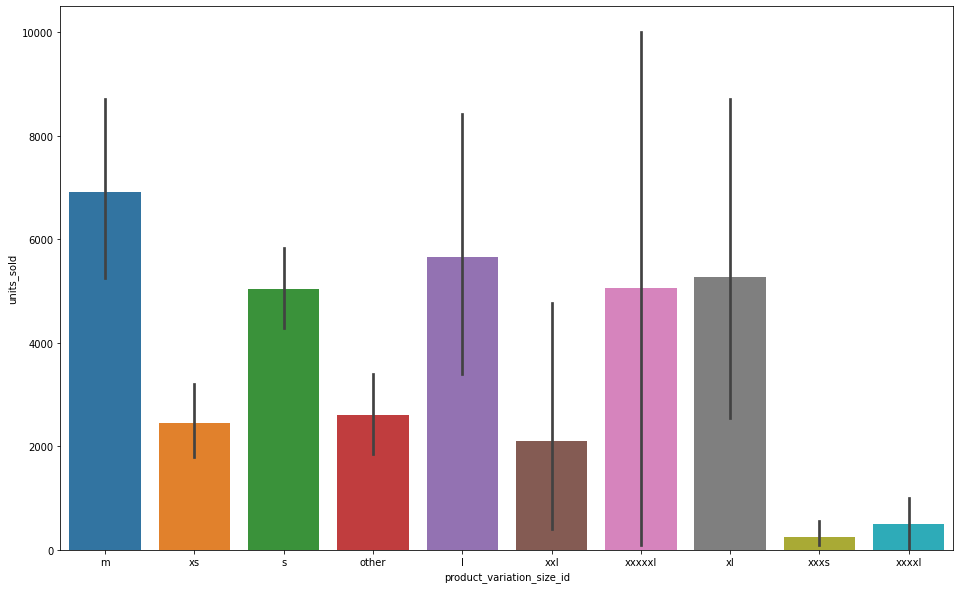

In [35]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.barplot(x="product_variation_size_id", y="units_sold", data=product_sales_df)

In [36]:
# we can see that the majority of the products are of size 'S' but size 'M' has the most units_sold

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


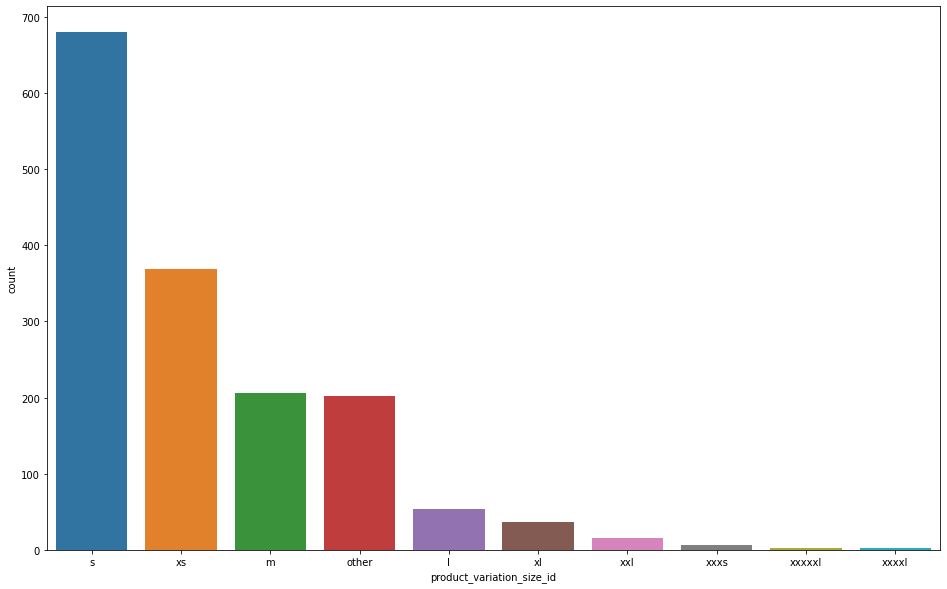

In [37]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot('product_variation_size_id',
              order = product_sales_df['product_variation_size_id'].value_counts().index,
              data = product_sales_df)
plt.show()

In [38]:
product_sales_df.groupby('shipping_option_name').agg(['count', 'sum'])['units_sold']

,count,sum
shipping_option_name,,
Ekspresowa wysyłka,1,10000
Envio Padrão,9,22400
Envío normal,5,16100
Expediere Standard,6,2400
Livraison Express,3,1200
Livraison standard,1508,6610705
Spedizione standard,2,1100
Standard Shipping,21,88550
Standardowa wysyłka,3,30100


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:

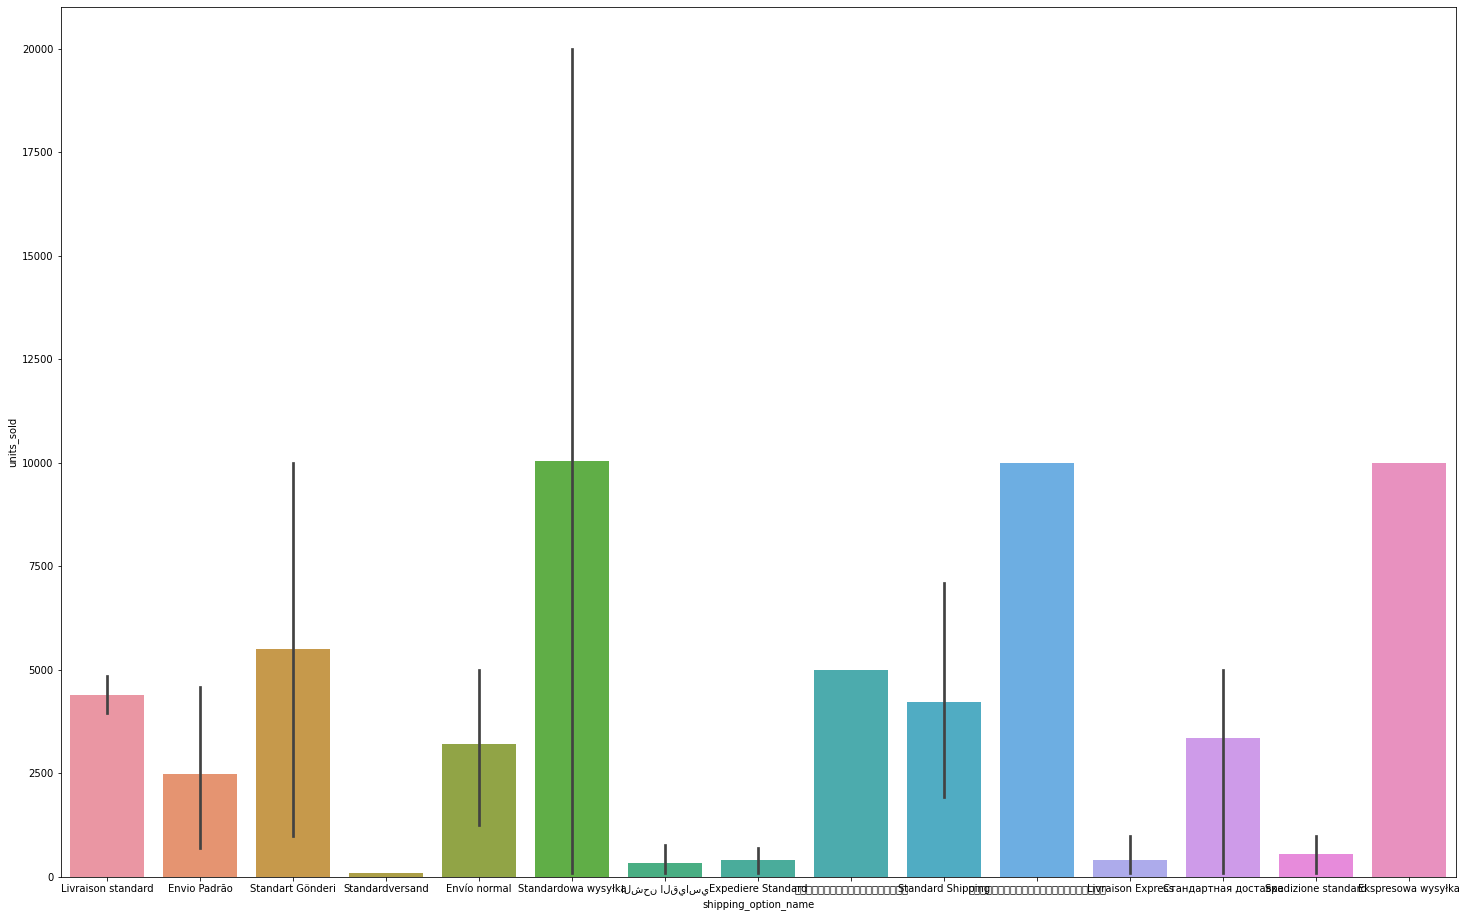

In [39]:
fig = plt.gcf()
fig.set_size_inches( 25, 16)
sns.barplot(x="shipping_option_name", y="units_sold", data=product_sales_df)
plt.show()

In [40]:
# urgency_text
product_sales_df.urgency_text.value_counts()

Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [41]:
#origin Country
product_sales_df.groupby('origin_country').agg(['count', 'sum'])['units_sold']

,count,sum
origin_country,,
AT,1,100
CN,1516,6651245
GB,1,1000
SG,2,20100
US,31,43560
VE,5,350


In [42]:
list_of_na_merchants = product_sales_df[product_sales_df['origin_country'].isna()]['merchant_id'].values

for m in list_of_na_merchants:
    print("merchant title " + m)
    print(product_sales_df[product_sales_df['merchant_id']==m]['origin_country'])

merchant title 5268759b736046671957190c
56      NaN
507     NaN
921     NaN
1147    NaN
1289    NaN
Name: origin_country, dtype: object
merchant title 5177b0b63feb620dd802a197
180     NaN
802     NaN
1059    NaN
1229    NaN
1256    NaN
Name: origin_country, dtype: object
merchant title 52bd3ddb34067e4620a4c62d
498     NaN
943     NaN
1296    NaN
Name: origin_country, dtype: object
merchant title 5268759b736046671957190c
56      NaN
507     NaN
921     NaN
1147    NaN
1289    NaN
Name: origin_country, dtype: object
merchant title 542a670d4f66d92eba599455
547    NaN
Name: origin_country, dtype: object
merchant title 52838e612dcc6469fa2d7104
632    NaN
679    NaN
Name: origin_country, dtype: object
merchant title 52838e612dcc6469fa2d7104
632    NaN
679    NaN
Name: origin_country, dtype: object
merchant title 5177b0b63feb620dd802a197
180     NaN
802     NaN
1059    NaN
1229    NaN
1256    NaN
Name: origin_country, dtype: object
merchant title 5268759b736046671957190c
56      NaN
507     N

In [43]:
product_sales_df['origin_country'].fillna('CN', inplace=True)

In [44]:
# We are done with processing the categorical columns & Now lets start with the numerical data
product_sales_df['success'] = product_sales_df['units_sold'].apply(lambda x: 1 if x>1000 else 0)

<AxesSubplot:xlabel='rating_count', ylabel='units_sold'>

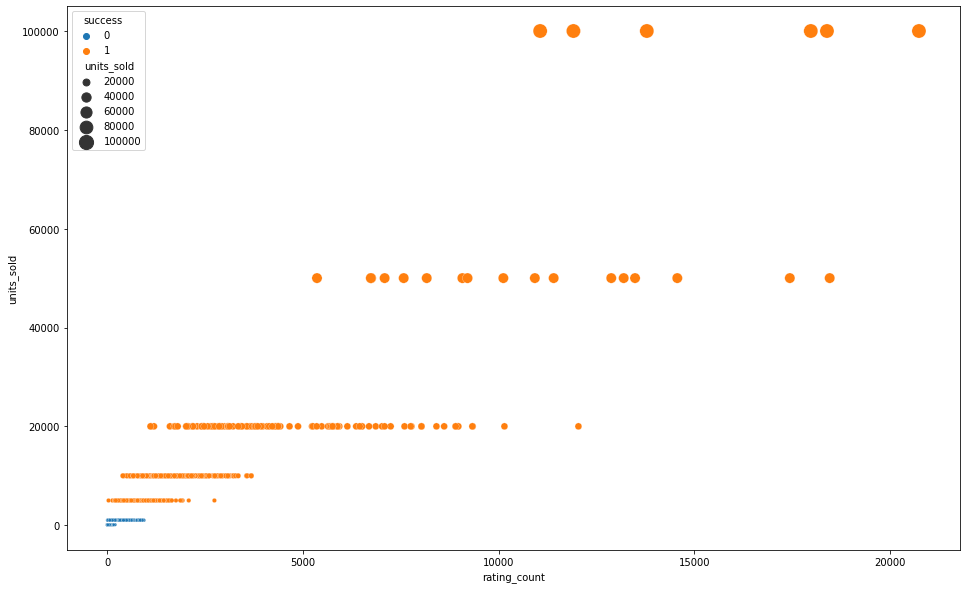

In [45]:
#rating Count

fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.scatterplot(data=product_sales_df, x="rating_count", y="units_sold", hue='success', size='units_sold', sizes=(10, 200))

In [46]:
# we can see that the number of rating affects the success of a product greatly.

In [47]:
#Normalising the data as rating 1 is less likey to be sold as compared to rating 5
product_sales_df.update(product_sales_df[['rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count']].fillna(0))
product_sales_df.loc[product_sales_df['rating_count']==0, 'rating'] = 0

In [48]:
product_sales_df[['rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count', 'rating_count', 'rating']].head()

,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_count,rating
0,26.0,8.0,10.0,1.0,9.0,54,3.76
1,2269.0,1027.0,1118.0,644.0,1077.0,6135,3.45
2,5.0,4.0,2.0,0.0,3.0,14,3.57
3,295.0,119.0,87.0,42.0,36.0,579,4.03
4,6.0,4.0,2.0,2.0,6.0,20,3.10


<AxesSubplot:xlabel='success', ylabel='rating_five_count'>

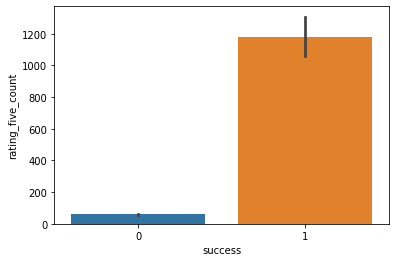

In [49]:
sns.barplot(x='success', y='rating_five_count', data=product_sales_df)

<AxesSubplot:xlabel='success', ylabel='rating_one_count'>

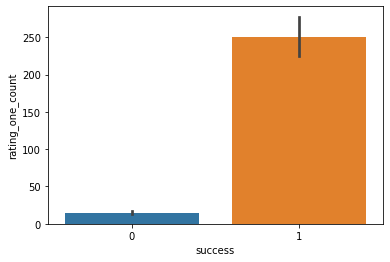

In [50]:
sns.barplot(x='success', y='rating_one_count', data=product_sales_df)

In [51]:
product_sales_df['rating_three_count_prop'] = product_sales_df['rating_three_count']/product_sales_df['rating_count']
product_sales_df['rating_four_count_prop'] = product_sales_df['rating_four_count']/product_sales_df['rating_count']
product_sales_df['rating_five_count_prop'] = product_sales_df['rating_five_count']/product_sales_df['rating_count']
product_sales_df['rating_two_count_prop'] = product_sales_df['rating_two_count']/product_sales_df['rating_count']
product_sales_df['rating_one_count_prop'] = product_sales_df['rating_one_count']/product_sales_df['rating_count']
# to remove nan due to zero division
product_sales_df.update(product_sales_df[['rating_five_count_prop', 'rating_four_count_prop', 'rating_three_count_prop','rating_two_count_prop', 'rating_one_count_prop']].fillna(0))

<AxesSubplot:xlabel='success', ylabel='rating_one_count_prop'>

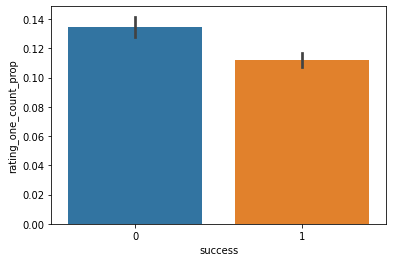

In [52]:
sns.barplot(x='success', y='rating_one_count_prop', data=product_sales_df)

<AxesSubplot:xlabel='success', ylabel='rating_five_count_prop'>

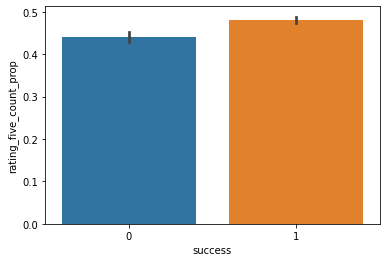

In [53]:
sns.barplot(x='success', y='rating_five_count_prop', data=product_sales_df)

<AxesSubplot:xlabel='success', ylabel='rating_four_count_prop'>

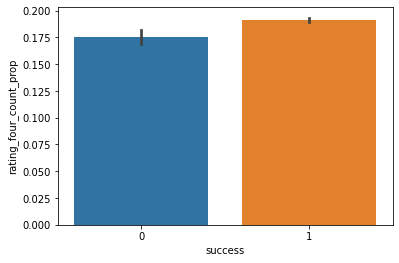

In [54]:
sns.barplot(x='success', y='rating_four_count_prop', data=product_sales_df)

<AxesSubplot:xlabel='merchant_has_profile_picture', ylabel='count'>

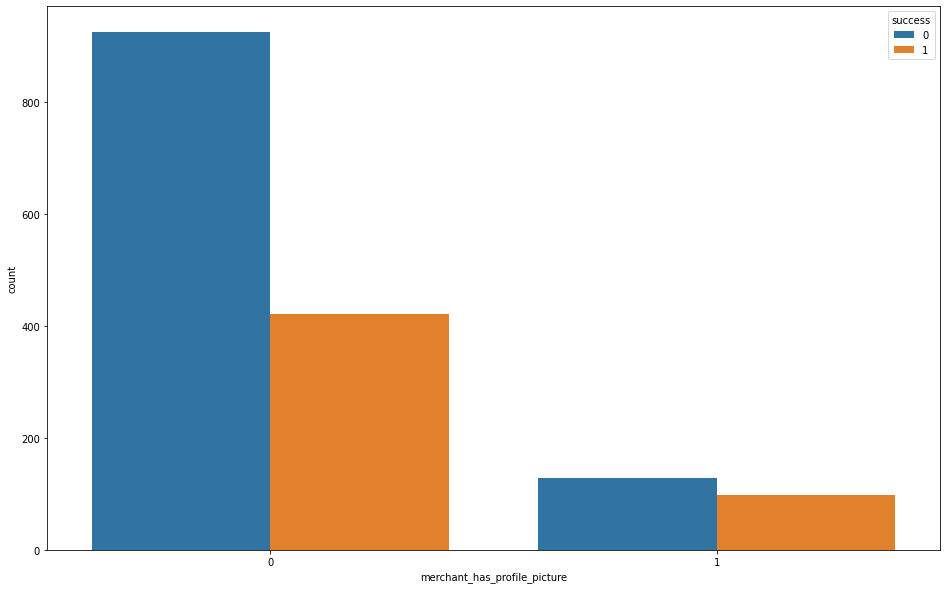

In [55]:
#merchant_rating_count

fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot(data=product_sales_df, x='merchant_has_profile_picture', hue='success')

<AxesSubplot:xlabel='success', ylabel='merchant_rating'>

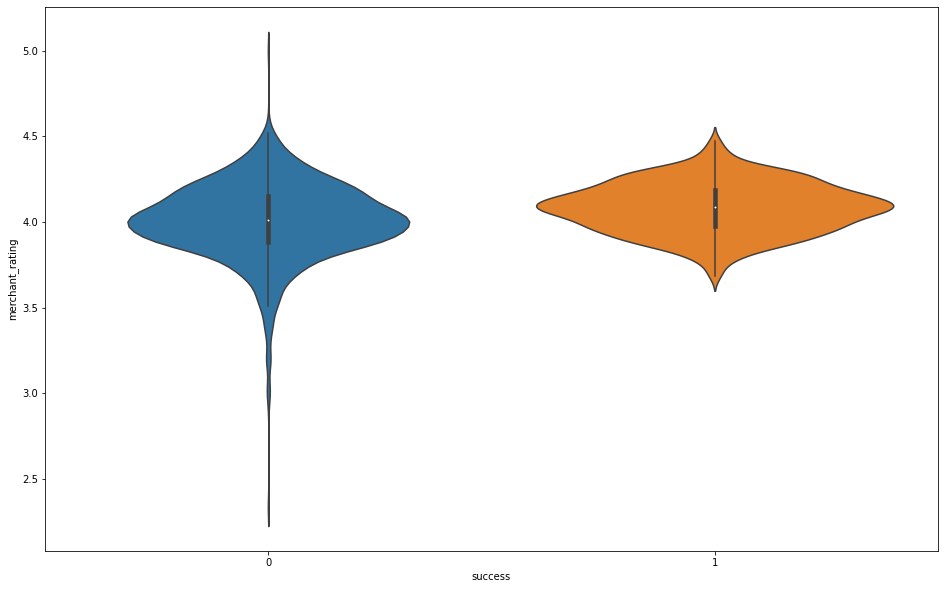

In [56]:
# merchant_rating &  from the above graph merchant is more likely to be successful if he has a profile picture
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.violinplot(data=product_sales_df, y='merchant_rating', x='success')

In [57]:
product_sales_df['has_urgency_banner'] = product_sales_df['has_urgency_banner'].fillna(0)

In [58]:
## dropping unnecessary columns
product_sales_df = product_sales_df.drop(['crawl_month','product_id','product_picture', 'product_url', 'merchant_profile_picture', 'merchant_id',
                       'currency_buyer', 'theme','urgency_text', 'merchant_title', 'merchant_name', 'merchant_info_subtitle',
                      'title','title_orig','tags', 'shipping_option_name', "inventory_total" , "badge_fast_shipping" ,
                       "badge_local_product" , "shipping_is_express", "units_sold"], axis = 1)

In [59]:
product_sales_df = product_sales_df.drop(["rating_five_count","rating_four_count","rating_three_count", "rating_two_count", "rating_one_count"], axis = 1)

In [60]:
product_sales_df = pd.get_dummies(product_sales_df, 
                           columns = ['product_color'],
                           prefix = 'color_',
                           drop_first = True)
product_sales_df.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_variation_size_id,product_variation_inventory,shipping_option_price,...,color__dual,color__green,color__grey,color__orange,color__other,color__pink,color__purple,color__red,color__white,color__yellow
0,16.00,14,0,3.76,54,0,0,m,50,4,...,0,0,0,0,0,0,0,0,1,0
1,8.00,22,1,3.45,6135,0,0,xs,50,2,...,0,1,0,0,0,0,0,0,0,0
2,8.00,43,0,3.57,14,0,0,xs,1,3,...,0,0,0,0,1,0,0,0,0,0
3,8.00,8,1,4.03,579,0,0,m,50,2,...,0,0,0,0,0,0,0,0,0,0
4,2.72,3,1,3.10,20,0,0,s,1,1,...,0,0,0,0,0,0,0,0,0,1


In [61]:
product_sales_df = pd.get_dummies(product_sales_df, 
                           columns = ['product_variation_size_id'],
                           prefix = 'size_',
                           drop_first = True)
product_sales_df.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_variation_inventory,shipping_option_price,countries_shipped_to,...,color__yellow,size__m,size__other,size__s,size__xl,size__xs,size__xxl,size__xxxs,size__xxxxl,size__xxxxxl
0,16.00,14,0,3.76,54,0,0,50,4,34,...,0,1,0,0,0,0,0,0,0,0
1,8.00,22,1,3.45,6135,0,0,50,2,41,...,0,0,0,0,0,1,0,0,0,0
2,8.00,43,0,3.57,14,0,0,1,3,36,...,0,0,0,0,0,1,0,0,0,0
3,8.00,8,1,4.03,579,0,0,50,2,41,...,0,1,0,0,0,0,0,0,0,0
4,2.72,3,1,3.10,20,0,0,1,1,35,...,1,0,0,1,0,0,0,0,0,0


In [62]:
product_sales_df = pd.get_dummies(product_sales_df, 
                           columns = ['origin_country'],
                           prefix = 'country_',
                           drop_first = True)
product_sales_df.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_variation_inventory,shipping_option_price,countries_shipped_to,...,size__xs,size__xxl,size__xxxs,size__xxxxl,size__xxxxxl,country__CN,country__GB,country__SG,country__US,country__VE
0,16.00,14,0,3.76,54,0,0,50,4,34,...,0,0,0,0,0,1,0,0,0,0
1,8.00,22,1,3.45,6135,0,0,50,2,41,...,1,0,0,0,0,1,0,0,0,0
2,8.00,43,0,3.57,14,0,0,1,3,36,...,1,0,0,0,0,1,0,0,0,0
3,8.00,8,1,4.03,579,0,0,50,2,41,...,0,0,0,0,0,1,0,0,0,0
4,2.72,3,1,3.10,20,0,0,1,1,35,...,0,0,0,0,0,1,0,0,0,0


In [63]:
product_sales_df.dtypes

price                           float64
retail_price                      int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_product_quality             int64
product_variation_inventory       int64
shipping_option_price             int64
countries_shipped_to              int64
has_urgency_banner              float64
merchant_rating_count             int64
merchant_rating                 float64
merchant_has_profile_picture      int64
tags_count                        int64
success                           int64
rating_three_count_prop         float64
rating_four_count_prop          float64
rating_five_count_prop          float64
rating_two_count_prop           float64
rating_one_count_prop           float64
color__blue                       uint8
color__brown                      uint8
color__dual                       uint8
color__green                      uint8


In [64]:
product_sales_df.isna().any().to_frame()

,0
price,False
retail_price,False
uses_ad_boosts,False
rating,False
rating_count,False
badges_count,False
badge_product_quality,False
product_variation_inventory,False
shipping_option_price,False
countries_shipped_to,False


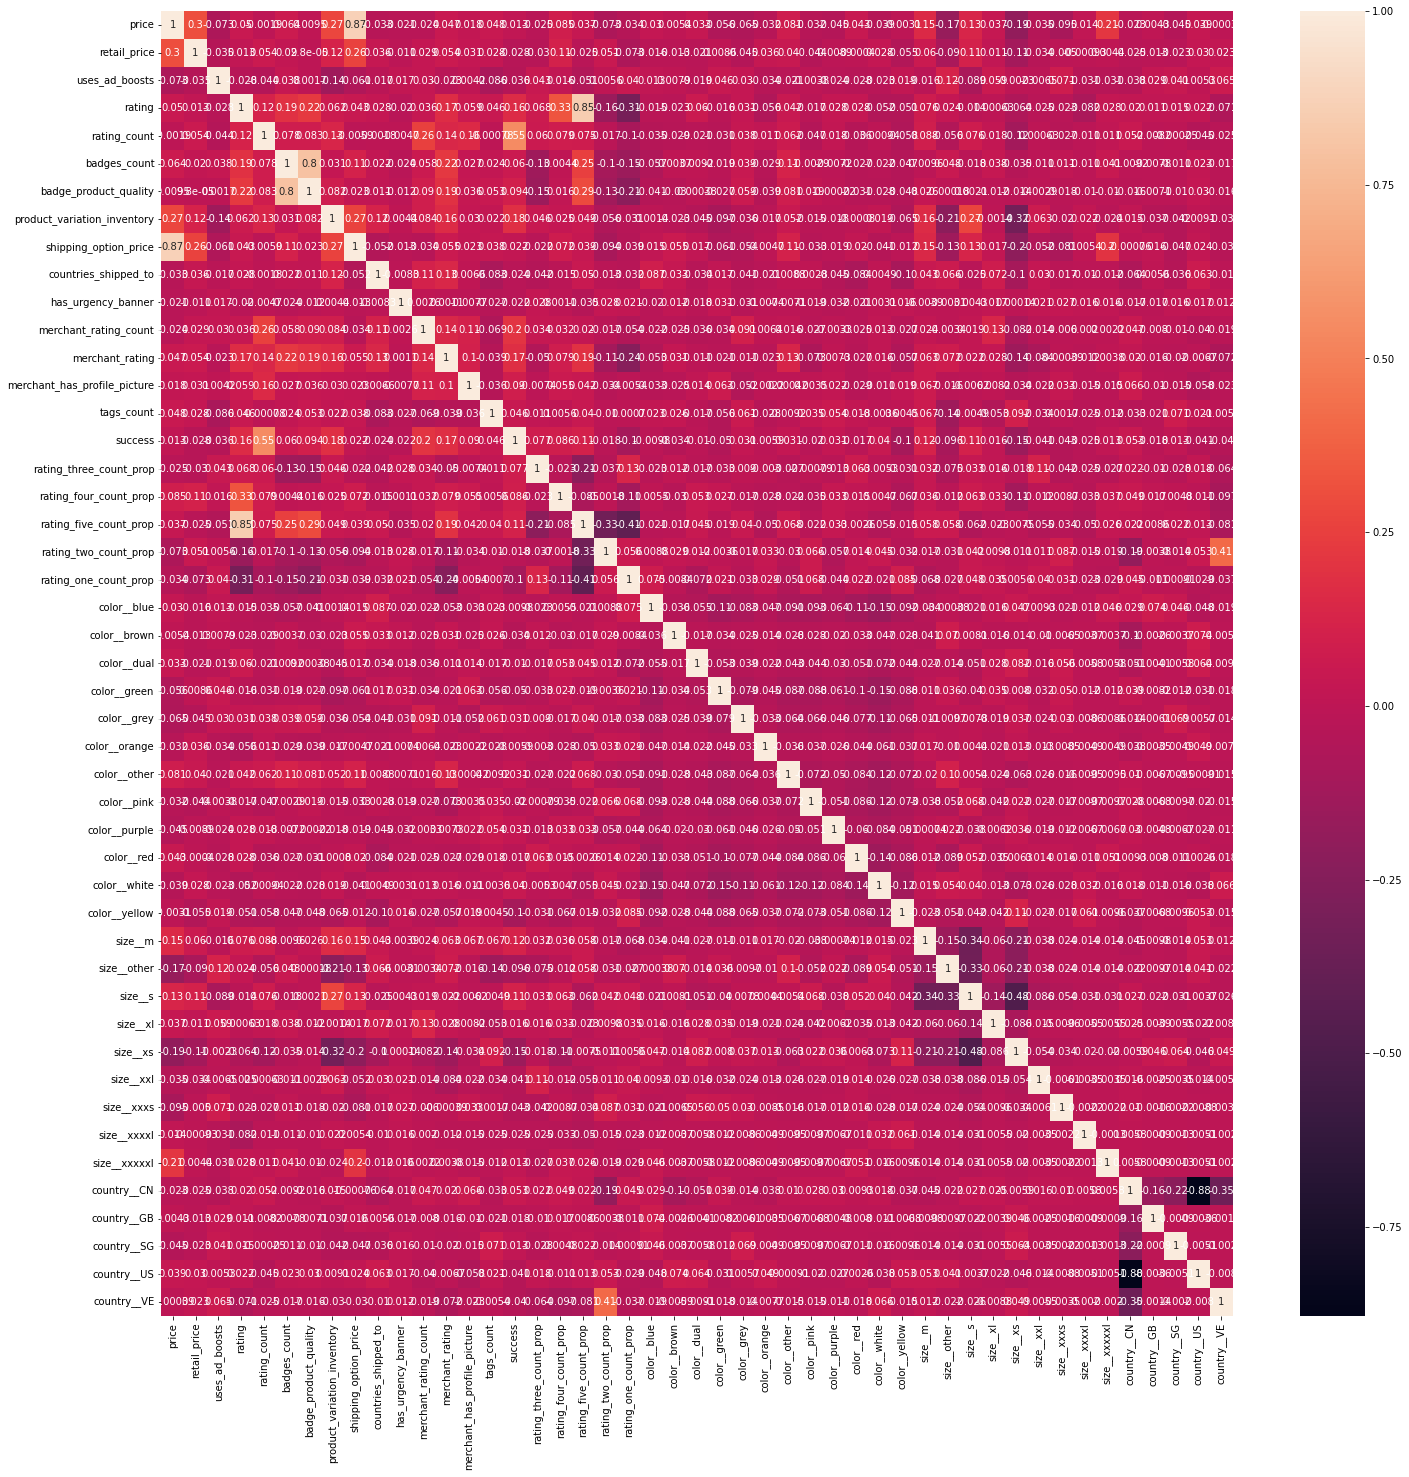

In [65]:
plt.figure(figsize=(24,24))
sns.heatmap(product_sales_df.corr(), annot=True)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(product_sales_df.drop(['success'], axis=1), product_sales_df['success'],
test_size=0.2, random_state=1, stratify=product_sales_df['success'])

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
train_scaled = sc.fit_transform(X_train)
test_scaled = sc.transform(X_test)

pca = PCA(n_components=20)
train_reduced = pca.fit_transform(train_scaled)
test_reduced = pca.transform(test_scaled)
print(train_reduced.shape)
print(test_reduced.shape)

(1258, 20)
(315, 20)


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.9682539682539683

<AxesSubplot:ylabel='feature'>

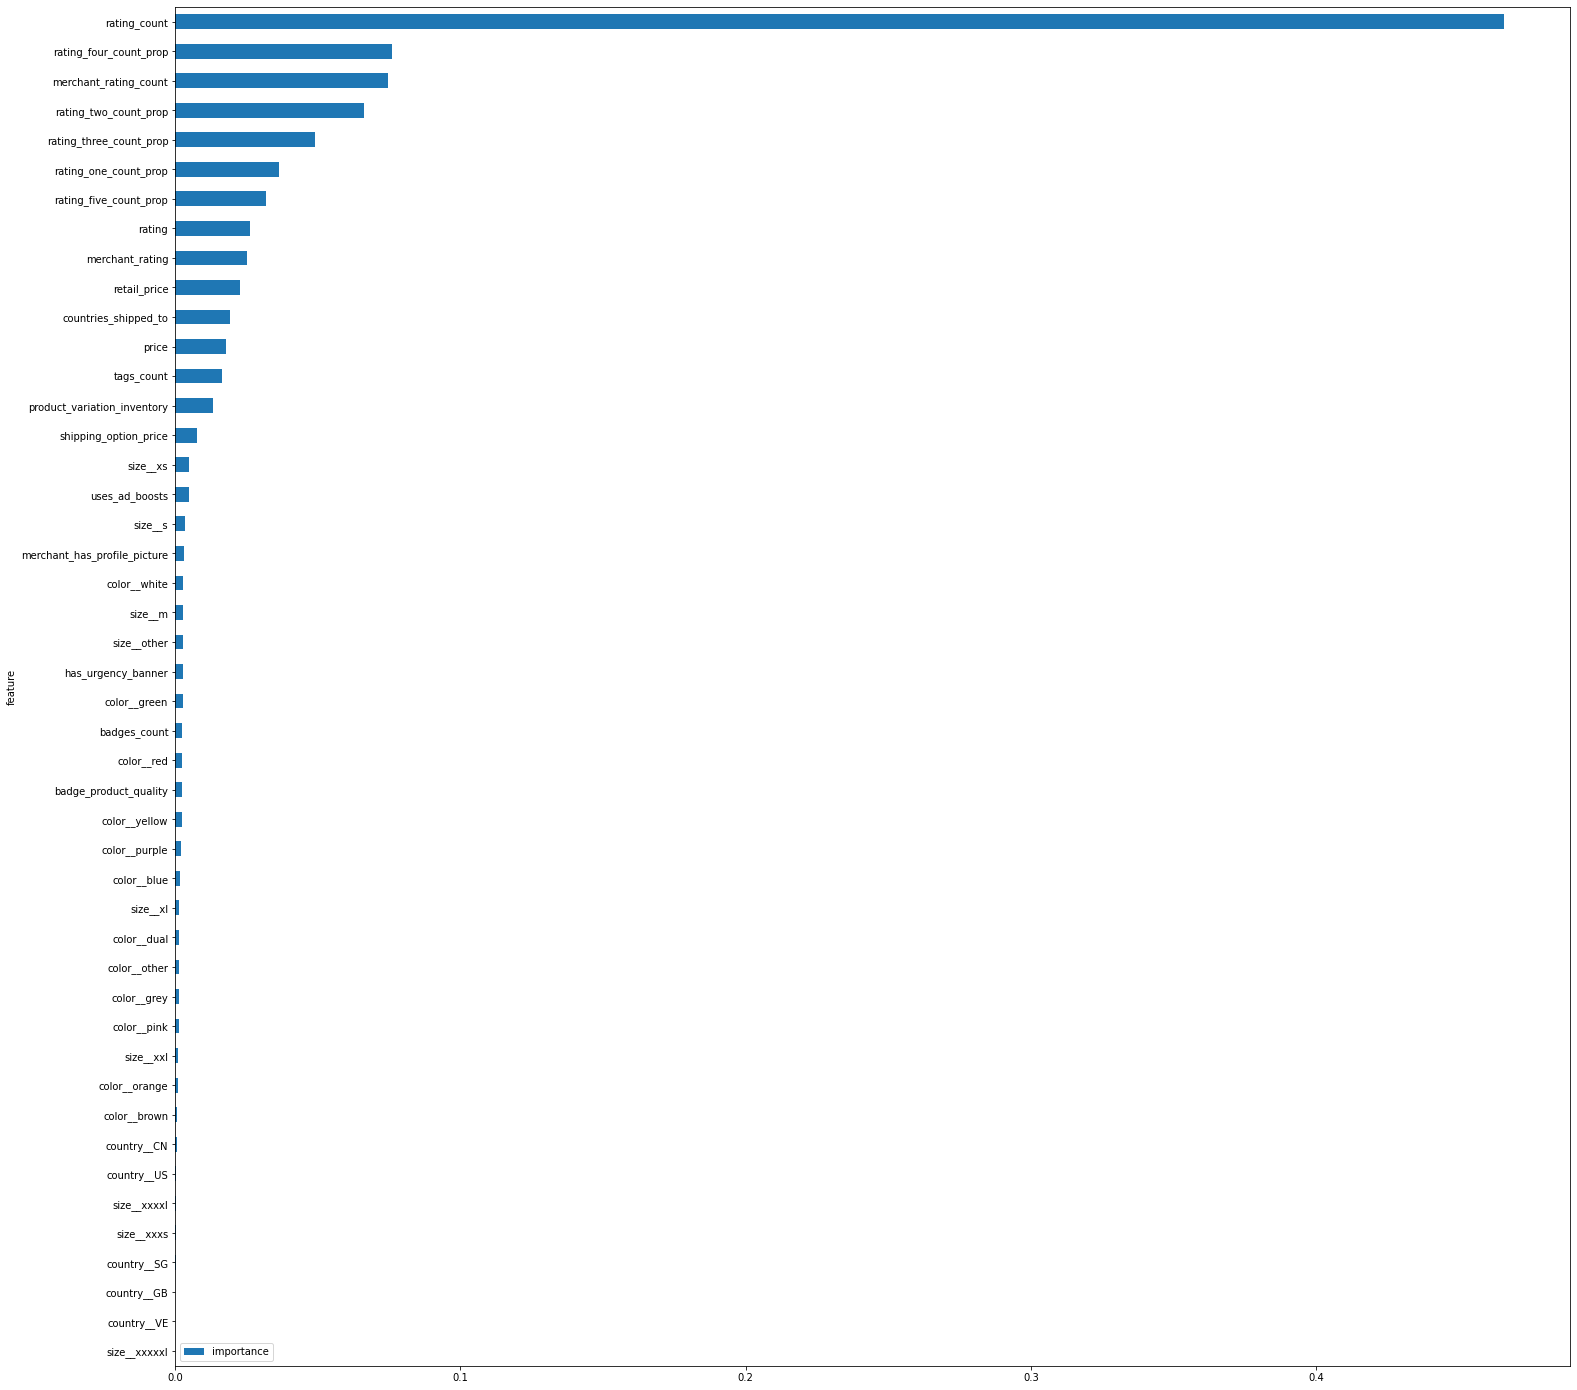

In [69]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

<AxesSubplot:ylabel='feature'>

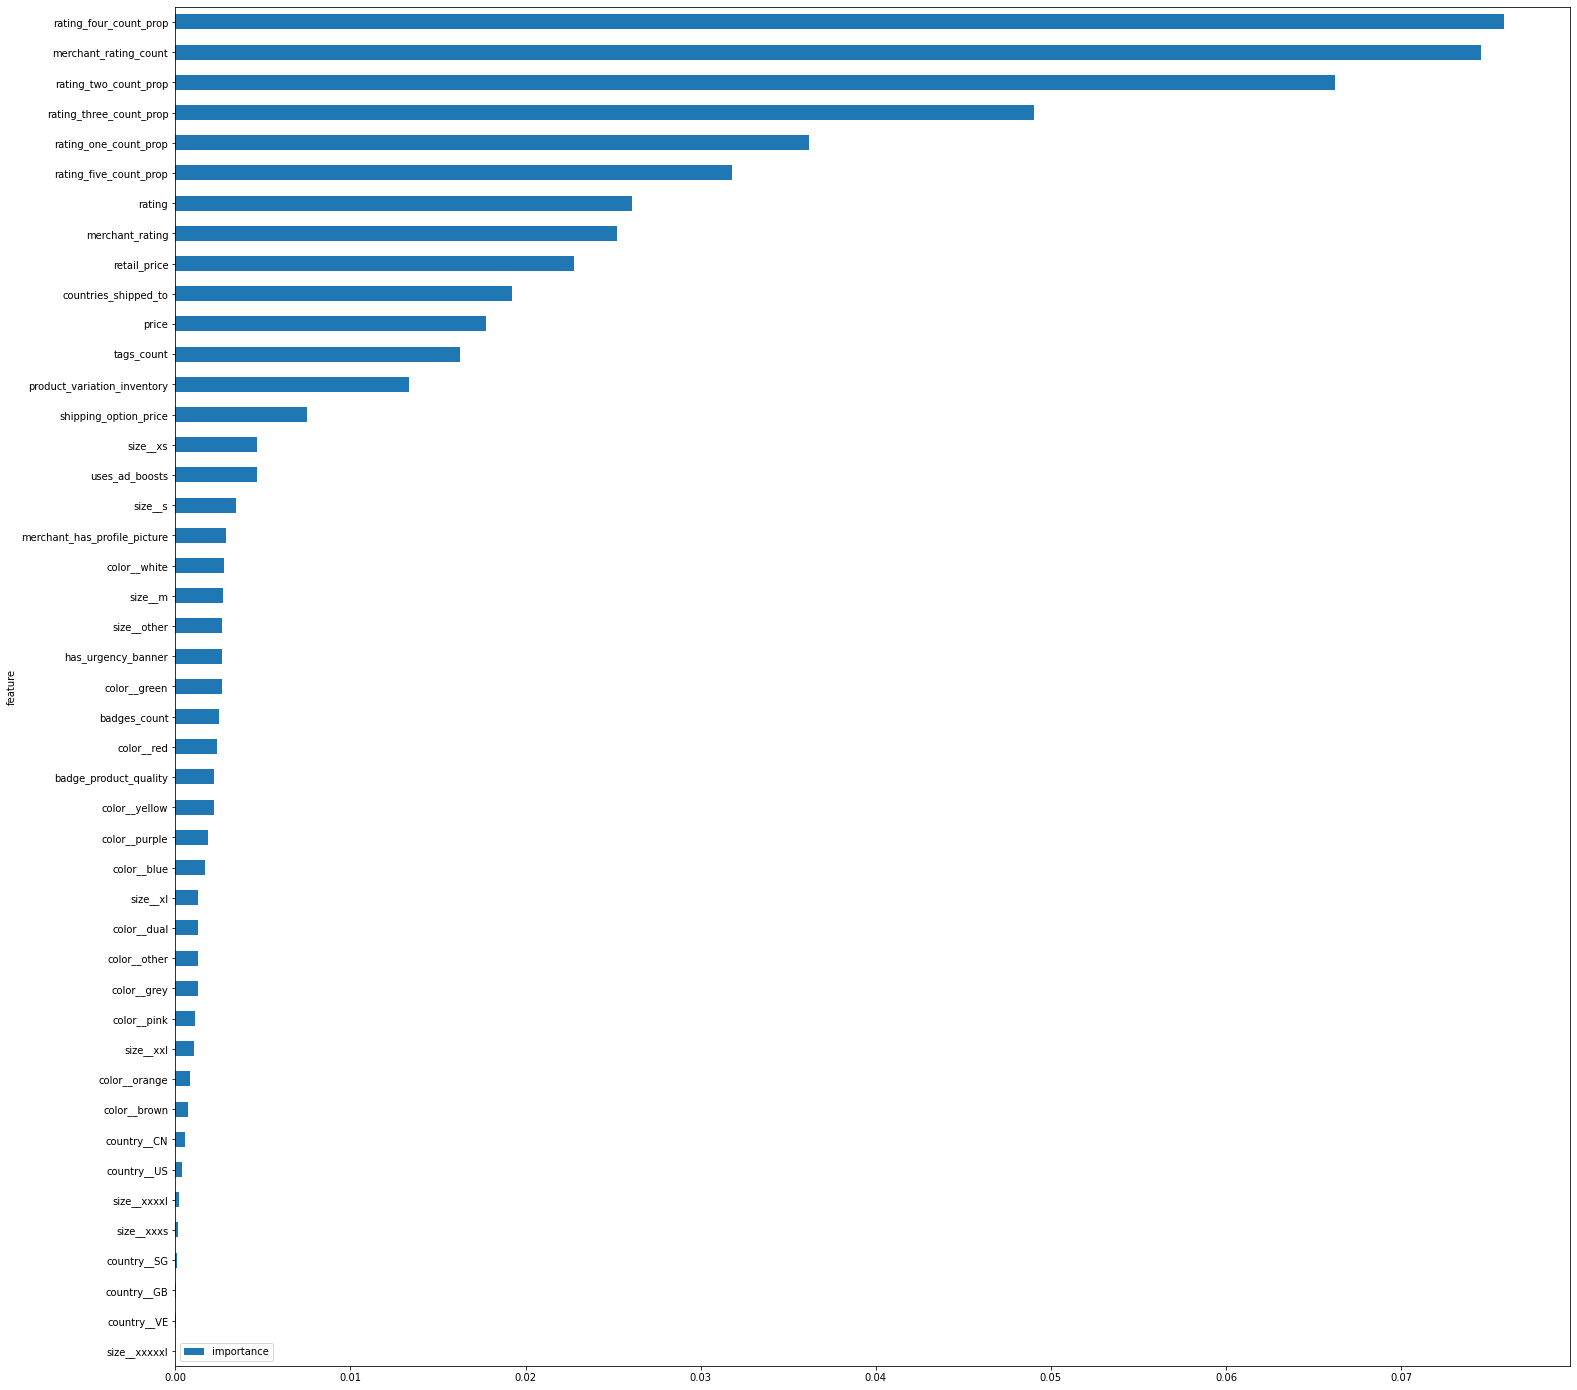

In [70]:
# rating count has too much effect on our target variable

features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features = features[features['feature']!='rating_count']
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [72]:
# removing the unnecessary features and see how it affects our accuracy
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
print(train_reduced.shape)

test_reduced = model.transform(X_test)
print(test_reduced.shape)

(1258, 10)
(315, 10)


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [73]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(train_reduced, y_train)

y_pred = clf.predict(test_reduced)

accuracy_score(y_pred, y_test)

0.9555555555555556

In [ ]:
#Random Classifier seems to be working better with th current dataset